In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [2]:
seuil = 1/2
a = 1e-2
epsilon = 1e-6
H = np.array([[a,1],
              [1,1/a + epsilon]]) 
P = 2 * np.array([[1,0],
              [0,0]])


H_tilde = P@H
print('H_tilde:\n', H_tilde)
print('norm of H_tilde:', np.linalg.norm(H_tilde, ord=2))

gamma_n = seuil / np.linalg.norm(H_tilde)
print('gamma:', gamma_n)

R = np.eye(2) - gamma_n * H_tilde
norm = np.linalg.norm(R, ord=2)
eigenvectors, eigenvalues = np.linalg.eig(R)

print('norm of I- gamma H_tilde:', norm)
print('ratio:', (norm - 1) / seuil)
# print('eigenvalues:', eigenvalues)
# print('eigenvectors:', eigenvectors)

H_tilde:
 [[0.02 2.  ]
 [0.   0.  ]]
norm of H_tilde: 2.000099997500125
gamma: 0.24998750093742192
norm of I- gamma H_tilde: 1.2783483116051932
ratio: 0.5566966232103865


valeurs propres:  [1.13686838e-13 1.00000100e+03]


100%|██████████| 99/99 [00:00<00:00, 20069.41it/s]

nombre de fois sans update: 58


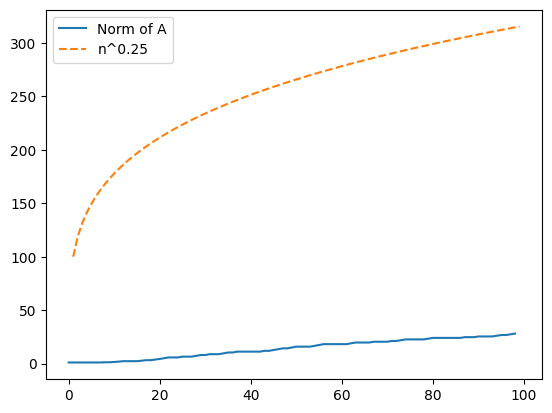

In [ ]:
A = np.eye(2)
a = 1e-3
epsilon = 1e-8
H = np.array([[a, 1], [1, 1 / a + epsilon]])
# H = np.array([[a,1],
#               [1,a]])
H_inv = np.linalg.inv(H)
print("valeurs propres: ", np.linalg.eigvals(H))

norm_list = []
error_list = []
N = int(1e5)

count = 0
for n in tqdm(range(1, N)):
    try:
        norm_list.append(np.linalg.norm(A, ord=2))
    except:
        print(A)
        break
    # error_list.append(np.linalg.norm(H_inv - A, ord=2))
    gamma_n = n ** (-0.75)
    M = np.zeros_like(H)
    z = random.randint(0, 1)

    # meilleure colonne de H mais fait exploser lambda max en 100 iter avec seuil=1, 
    # calme sans multiplier par seuil
    # M[1,1] = 2
    # pire colonne de H, lambda_max grandit polynomial sans seuil, et lineairement avec
    # M[0, 0] = 2  

    # lambda_max grandit polynimial sans seuil, et exp avec
    M[z,z]=2
    # M[n%2, n%2] = 2

    # seuil = 2 / np.e - 0.0037
    seuil = 1 / 2
    H_tilde = M @ H
    # H_tilde *= seuil / (gamma_n * np.linalg.norm(H_tilde, ord=2) + epsilon)
    if gamma_n * np.linalg.norm(H_tilde, ord=2) <= seuil:
        A = A - gamma_n * (H_tilde @ A + A @ H_tilde.T + gamma_n * H_tilde @ A @ H_tilde.T + M)
    else:
        count += 1
print("nombre de fois sans update:", count)

# Generate n^0.25 values for comparison
n_values = np.arange(1, N)  # Create an array of n values
# exp = 0.64
exp = 0.25
n_power = 100 * n_values ** exp

# Plot norm_list and n^(1-gamma
plt.plot(norm_list, label="Norm of A")
# plt.plot(error_list, label="Error")
plt.plot(n_values, n_power, label=f"n^{exp}", linestyle="--")
plt.legend()
plt.show()

In [4]:
print(M @ H)
print(H_inv)

[[2.e-05 2.e+00]
 [0.e+00 0.e+00]]
[[ 1.00079992e+18 -1.00079992e+13]
 [-1.00079992e+13  1.00079992e+08]]


In [5]:
print(2/np.e)
print(0.01/np.e)
print(1.99008 / np.e)

0.7357588823428847
0.0036787944117144234
0.732109518286464


In [6]:
print(np.linalg.norm(np.linalg.inv(H), ord=2))

1.0007999172936236e+18
